# Pizzageon

Renaissance du projet pizzageon, petit dataset contenant des pizzas et des pigeons. Le but sera d'entraîner un réseau neuronal classique et un réseau convolutionnel pour comparer les performances.

## Le dataset

### Import


In [0]:
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

class Dataset:
    target = None
    data = None

In [27]:
 with open("dataset.pkl", "rb") as file:
    dataset = pickle.load(file)
    
dataset

Exemples

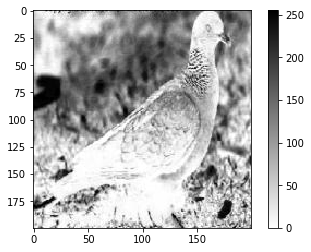

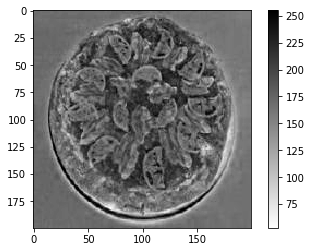

In [28]:
def plot_image(array_img):
	plt.figure()
	plt.imshow(array_img, cmap=plt.cm.binary)
	plt.colorbar()
	plt.grid(False)
	plt.show()
    

pigeon_ex = dataset.data[0]
pizza_ex = dataset.data[-1]

# Plot la composante Rouge
plot_image(pigeon_ex[0])
plot_image(pizza_ex[0])

## Preprocessing
### Converting from channel_first to channel_last format in order to allow keras to work with tensorflow backend


In [29]:
print(dataset.data[0, :, 0, 0])
dataset.data = dataset.data.swapaxes(1, 3) # chan <-> width
dataset.data = dataset.data.swapaxes(1, 2) # width <-> height
print(dataset.data[0, 0, 0, :])

[55 74 44]
[55 74 44]


### Normalisation

In [30]:
dataset.data = dataset.data / 255

dataset.data[-1]

array([[[0.62745098, 0.3372549 , 0.38823529],
        [0.63529412, 0.34509804, 0.39607843],
        [0.64705882, 0.35686275, 0.40784314],
        ...,
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902]],

       [[0.63921569, 0.34901961, 0.4       ],
        [0.64313725, 0.35294118, 0.40392157],
        [0.65098039, 0.36078431, 0.41176471],
        ...,
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902]],

       [[0.65098039, 0.36078431, 0.41176471],
        [0.65490196, 0.36470588, 0.41568627],
        [0.65882353, 0.36862745, 0.41960784],
        ...,
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902],
        [0.61176471, 0.32156863, 0.37254902]],

       ...,

       [[0.6627451 , 0.37254902, 0.42352941],
        [0.6627451 , 0.37254902, 0.42352941],
        [0.6627451 , 0

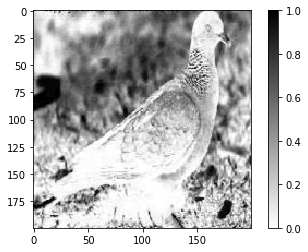

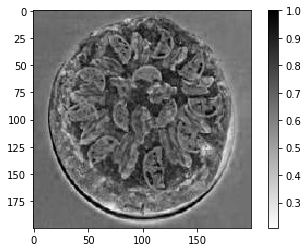

In [31]:
# Plot la composante Rouge après normalisation pour vérification
pigeon_ex = dataset.data[0]
pizza_ex = dataset.data[-1]
plot_image(pigeon_ex[:, :, 0])
plot_image(pizza_ex[:, :, 0])

### Shuffle the dataset

In [0]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

dataset.target, dataset.data = shuffle_in_unison(dataset.target, dataset.data)

In [0]:
# Test
a = np.random.rand(50)
b = a.copy()

a, b = shuffle_in_unison(a, b)
assert (a == b).all()

In [0]:
idx = np.random.randint(dataset.target.size)
ex_1 = (dataset.data[idx], dataset.target[idx])

idx = np.random.randint(dataset.target.size)
ex_2 = (dataset.data[idx], dataset.target[idx])

idx = np.random.randint(dataset.target.size)
ex_3 = (dataset.data[idx], dataset.target[idx])

L'image devrait représenter :  Pizza


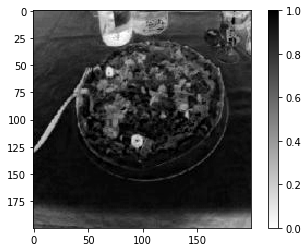

L'image devrait représenter :  Pizza


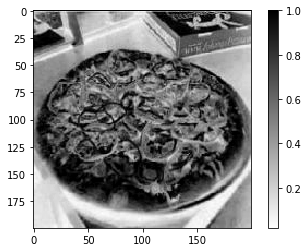

L'image devrait représenter :  Pizza


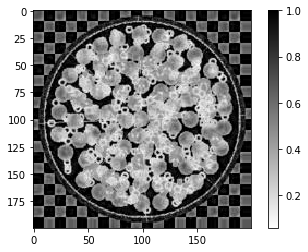

In [35]:
# plot la composante rouge de l'image de l'exemple 1
label = ["Pigeon", "Pizza"]
print("L'image devrait représenter : ", label[ex_1[1]])
plot_image(ex_1[0][:, :, 0])

print("L'image devrait représenter : ", label[ex_2[1]])
plot_image(ex_2[0][:, :, 0])

print("L'image devrait représenter : ", label[ex_3[1]])
plot_image(ex_3[0][:, :, 0])

## Vanilla NN

### build

In [0]:
model_nn = tf.keras.Sequential()
model_nn.add(tf.keras.layers.Flatten(input_shape=(200, 200, 3)))
model_nn.add(tf.keras.layers.Dense(128, activation='relu'))
model_nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

### compile

In [0]:
model_nn.compile(optimizer="adam",
             loss='binary_crossentropy',
             metrics=['accuracy'])

###test

In [38]:
print((model_nn.predict(dataset.data[:3])))
print(dataset.target[:3])

[[0.57787293]
 [0.525486  ]
 [0.5050713 ]]
[0 1 0]


### train

In [39]:
EPOCHS = 30

history = model_nn.fit(dataset.data, dataset.target, epochs=EPOCHS, validation_split = 0.2)

Train on 101 samples, validate on 26 samples
Epoch 1/30
101/101 [==============================] - 1s 6ms/sample - loss: 27.4712 - accuracy: 0.5545 - val_loss: 33.7564 - val_accuracy: 0.5000
Epoch 2/30
101/101 [==============================] - 0s 5ms/sample - loss: 37.6341 - accuracy: 0.5248 - val_loss: 23.5271 - val_accuracy: 0.5000
Epoch 3/30
101/101 [==============================] - 0s 4ms/sample - loss: 10.1270 - accuracy: 0.7426 - val_loss: 1.7356 - val_accuracy: 0.9231
Epoch 4/30
101/101 [==============================] - 0s 4ms/sample - loss: 3.4004 - accuracy: 0.8218 - val_loss: 2.3925 - val_accuracy: 0.9231
Epoch 5/30
101/101 [==============================] - 0s 4ms/sample - loss: 2.3985 - accuracy: 0.9406 - val_loss: 5.5741 - val_accuracy: 0.8077
Epoch 6/30
101/101 [==============================] - 0s 5ms/sample - loss: 3.3982 - accuracy: 0.9010 - val_loss: 2.3041 - val_accuracy: 0.9231
Epoch 7/30
101/101 [==============================] - 0s 5ms/sample - loss: 1.9852 - a

### Plot history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


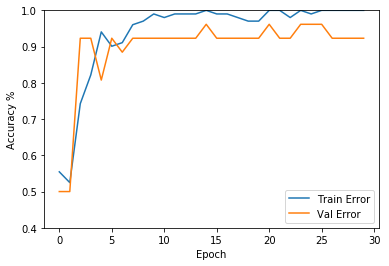

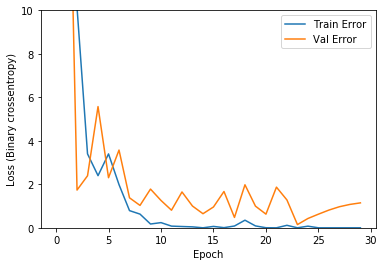

In [40]:
import pandas as pd

print(history.history.keys())

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy %')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Error')
  plt.ylim([0.4,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss (Binary crossentropy)')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()
  plt.show()

plot_history(history)

### Conclusion NN

Le réseau neuronal vanilla atteint une précision de 90% sur le set de validation

## CNN

### Build

In [0]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(200, 200, 3)))
model_cnn.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(1, activation='sigmoid'))

### Compile

In [0]:
model_cnn.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])

### Test

In [43]:
print((model_cnn.predict(dataset.data[:3])))
print(dataset.target[:3])

[[0.5261335 ]
 [0.5017595 ]
 [0.49626455]]
[0 1 0]


### Train

In [44]:
cnn_history = model_cnn.fit(dataset.data, dataset.target, validation_split=0.2, epochs=EPOCHS)

Train on 101 samples, validate on 26 samples
Epoch 1/30
101/101 [==============================] - 18s 177ms/sample - loss: 8.5719 - accuracy: 0.4554 - val_loss: 6.6756 - val_accuracy: 0.5000
Epoch 2/30
101/101 [==============================] - 17s 172ms/sample - loss: 2.6513 - accuracy: 0.6931 - val_loss: 2.0521 - val_accuracy: 0.5000
Epoch 3/30
101/101 [==============================] - 17s 170ms/sample - loss: 0.8415 - accuracy: 0.7030 - val_loss: 0.1052 - val_accuracy: 0.9231
Epoch 4/30
101/101 [==============================] - 17s 172ms/sample - loss: 0.1528 - accuracy: 0.9604 - val_loss: 0.2703 - val_accuracy: 0.9231
Epoch 5/30
101/101 [==============================] - 17s 170ms/sample - loss: 0.1684 - accuracy: 0.9505 - val_loss: 0.0523 - val_accuracy: 0.9615
Epoch 6/30
101/101 [==============================] - 17s 171ms/sample - loss: 0.0708 - accuracy: 0.9901 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 7/30
101/101 [==============================] - 17s 170ms/sample - 

### Plot history

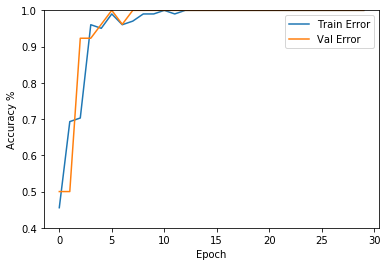

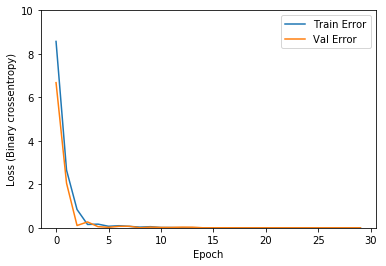

In [45]:
plot_history(cnn_history)

## Comparaisons

Il suffit de 5-10 itérations au CNN pour converger et atteinder une précision de 100% sur le dataset, tandis que le NN classique atteint au maximum ~90% sur le set de validation après une trentaine d'itérations